# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd #импорт библиотеки pandas для работы с датафреймом

import missingno as msno
import matplotlib.pyplot as plt

In [3]:
#присвоим перменную и прочитаем данные и разделим их через параметр sep='\t'
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
print(data.head(5))#посмотрим первые 5 строк таблицы

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [5]:
data.info() #изучим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

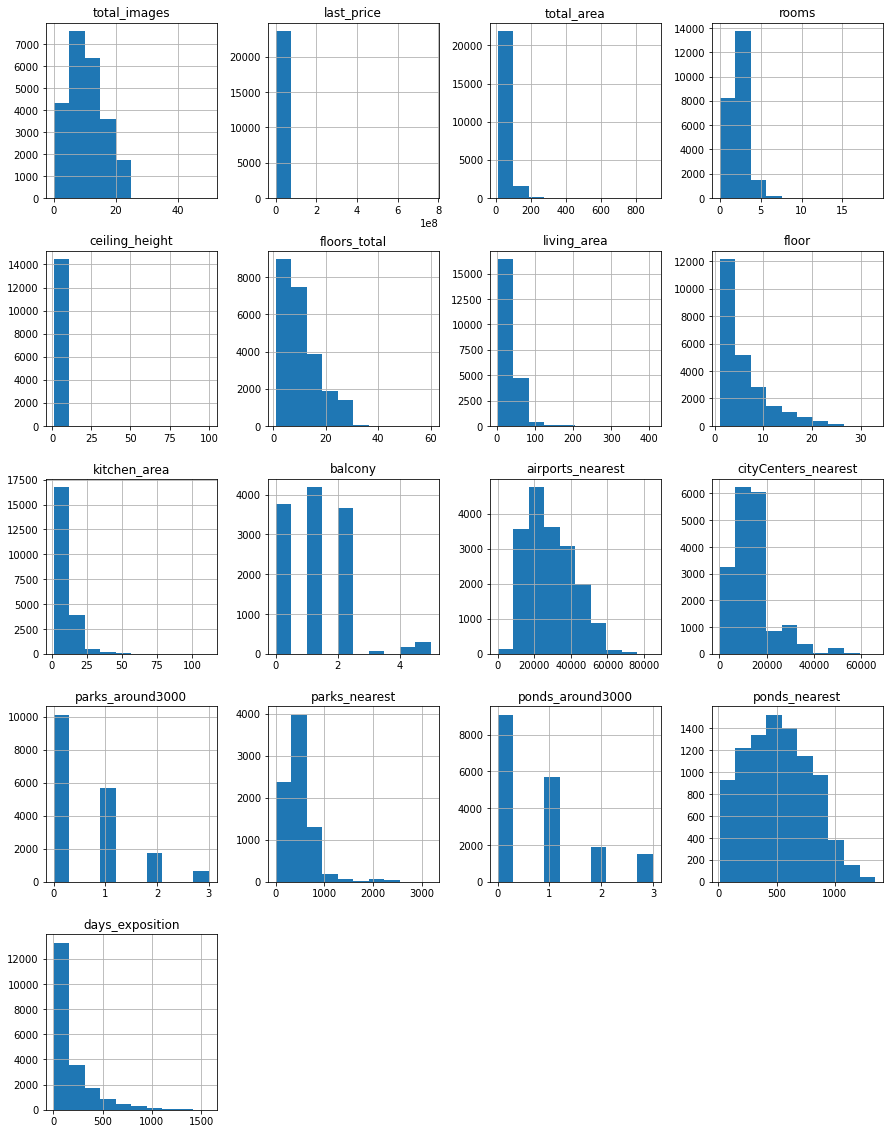

In [6]:
data.hist(figsize=(15, 20))
plt.show()

In [7]:
# Рассмотрим описание данных
description_data = ['Описание данных',
'airports_nearest — расстояние до ближайшего аэропорта в метрах (м)',
'balcony — число балконов',
'ceiling_height — высота потолков (м)',
'cityCenters_nearest — расстояние до центра города (м)',
'days_exposition — сколько дней было размещено объявление (от публикации до снятия)',
'first_day_exposition — дата публикации',
'floor — этаж',
'floors_total — всего этажей в доме',
'is_apartment — апартаменты (булев тип)',
'kitchen_area — площадь кухни в квадратных метрах (м²)',
'last_price — цена на момент снятия с публикации',
'living_area — жилая площадь в квадратных метрах (м²)',
'locality_name — название населённого пункта',
'open_plan — свободная планировка (булев тип)',
'parks_around3000 — число парков в радиусе 3 км',
'parks_nearest — расстояние до ближайшего парка (м)',
'ponds_around3000 — число водоёмов в радиусе 3 км',
'ponds_nearest — расстояние до ближайшего водоёма (м)',
'rooms — число комнат',
'studio — квартира-студия (булев тип)',
'total_area — общая площадь квартиры в квадратных метрах (м²)',
'total_images — число фотографий квартиры в объявлении']


**Вывод:** 1. Данные разделены не запятой,а знаком табуляции, поэтому применили доп. параметр sep для прочтения данных.

После открытия данных видим, что много столбцов с пропущенными значениями,

также есть столбцы с типом bool, их нужно будеть заменить на числовой тип данных,

также есть колонка первый день экспозиции - там дата и время, нужно поменять тип данных со строкового на дататайм.


### Выполните предобработку данных

Шаг 2. Выполните предобработку данных

Найдите и изучите пропущенные значения в столбцах:

<Определите, в каких столбцах есть пропуски.

<Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски.

<Пропущенные значения — тоже важный сигнал, который нужно учитывать.

<В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

<Рассмотрите типы данных в каждом столбце:

<Найдите столбцы, в которых нужно изменить тип данных.

<Преобразуйте тип данных в выбранных столбцах.

<В ячейке с типом markdown поясните, почему нужно изменить тип данных.

<Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.
Например, «поселок Рябово» и «поселок городского типа Рябово», 
«поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 
<Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

#### Определение столбцов с пропусками

In [8]:
# Выведем количество о пропущенных значений для каждого столбца. Используем isna() - найти строки с пропущенными 
# sum() - подсчитать количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<AxesSubplot:>

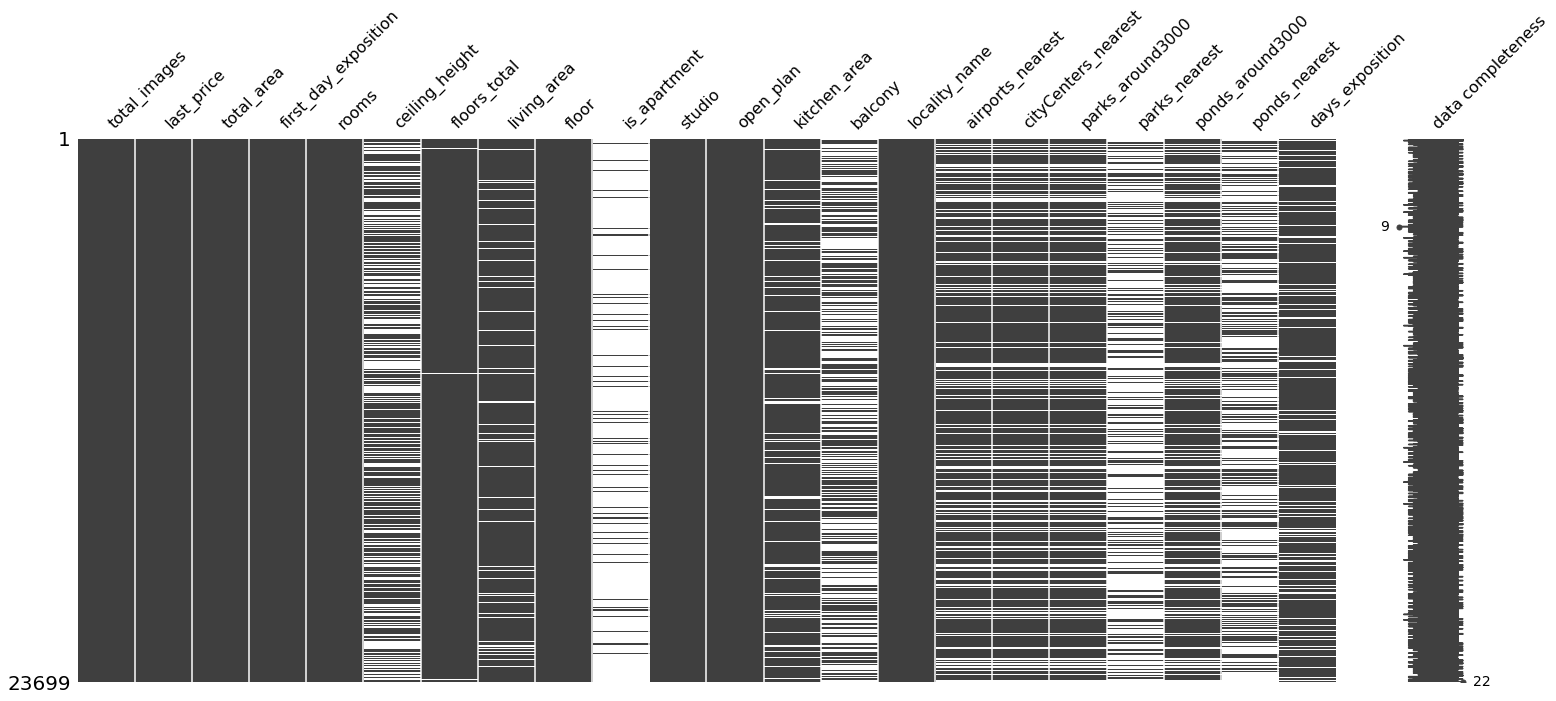

In [9]:
msno.matrix(data, labels=True)

Для визуализации пропусков используй https://russianblogs.com/article/5001266235/

**Вывод:** Найдено 14 столбцов с пропущенными значениями из 24,

8 из которых не имеют пропущенных значений. 

Из графика видно, что больше всего пропущенных значений в is_apartment

In [10]:
data['ceiling_height'].unique() # найдем уникальные значения столбца с высотой потолков

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**В столбце ceiling_height есть аномальные значения высота потолков которых от 6 метров.
Удалим строки, в которых встречаются такие аномальные значения из датафрейма data.
Также те что похожи на опечаток заменим на обычные значения например 25 сделаем 2.5**

In [11]:
data = data[(data['ceiling_height'] != 14) & (data['ceiling_height'] != 100) & (data['ceiling_height'] != 100) 
            & (data['ceiling_height'] != 20)
           & (data['ceiling_height'] != 10.3) & (data['ceiling_height'] != 14) & (data['ceiling_height'] != 8.3)
           & (data['ceiling_height'] != 1)  & (data['ceiling_height'] != 8) & (data['ceiling_height'] != 1.2)]

data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(27.  , 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(22.6 , 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(27.5 , 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(32.  , 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(26.  , 2.6)


**Ещё раз выведим перечень уникальных значений столбца `ceiling_height`, чтобы убедиться, что артефакты удалены.**

In [12]:
data['ceiling_height'].unique() # найдем уникальные значения столбца с высотой потолков

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.

In [13]:
# Рассмотрим медианное значение и сохраним его в переменную
median_ceiling_height = data['ceiling_height'].median() 
print(median_ceiling_height)

2.65


#### Замена пропущенных значений

##### Замена пропущенных значений ceiling_heigh
**Заменим пропущенные значения в столбце ceiling_height на медианное значение. Выведим на экран количество пропущенных значений по каждому столбцу.**

In [14]:
# fillna() Этот метод позволяет заменить пропущенные данные на указанное значение
data['ceiling_height'] = data['ceiling_height'].fillna(value=median_ceiling_height)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20916
studio                      0
open_plan                   0
kitchen_area             2276
balcony                 11514
locality_name              49
airports_nearest         5540
cityCenters_nearest      5517
parks_around3000         5516
parks_nearest           15615
ponds_around3000         5516
ponds_nearest           14583
days_exposition          3180
dtype: int64

In [15]:
data['ceiling_height'].describe()

count    23689.000000
mean         2.696871
std          0.221214
min          1.750000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

**Вывод :** 
В столбце ceiling_height (высота потолков) удалили строки, в которых встречаются аномальные значения.

Также те, что похожи на опечаток заменили на обычные значения например 25 м сделали 2.5 м.

Заменили пропущенные значения на медианное значение.

min высота потолков = 1.750000

25% объявлений имеют высоту потолков = 2.510000

50% объявлений имеют высоту потолков = 2.650000

75% объявлений имеют высоту потолков = 2.800000

max высота потолков = 6.000000

Всего 23689 значений

**Далее рассмотрим столбец 'floors_total' — всего этажей в доме',
Вызвав к столбцу floors_total метод value_counts(), который возвращает уникальные значения и количество их упоминаний, определим, сколько всего квартир с различными этажами домов.**

In [16]:
# Рассмотрим столбец через  функцию describe
data['floors_total'].describe()


count    23603.000000
mean        10.673770
std          6.597576
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [17]:
# рассмотрим значения по этажам квартиры
data['floor'].describe()

count    23689.000000
mean         5.892060
std          4.885004
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Заменим пропущенные значения в floors_total на значения из floor**

##### Замена пропущенных значений floors_total

In [18]:
# fillna() Этот метод позволяет заменить пропущенные данные на указанное значение
data['floors_total'].fillna(data['floor'], inplace=True)
data['floors_total'].describe()

count    23689.000000
mean        10.671409
std          6.596203
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод :**
В столбце floors_total (Всего этажей дома) заменили пропущенные значения на значения этажа из столбца floor

min количество этажей 1 этаж

25% объявлений имеют в доме всего = 5 этажей

50% объявлений имеют в доме всего = 9 этажей

75% объявлений имеют в доме всего = 16 этажей

max количество этажей = 60 этажей

Всего 23689 значений

**Рассмотрим подробнее столбец 'living_area' через describe()**

In [19]:
data['living_area'].describe() # living_area — жилая площадь в квадратных метрах (м²)'

count    21786.000000
mean        34.460835
std         22.033568
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

**Т.к это количественный показатель будет лучше заменить его на медианное значение вместо пропущенных значений.**

##### Замена пропущенных значений living_area

In [20]:
median_living_area = data['living_area'].median() 
data['living_area'] = data['living_area'].fillna(value=median_living_area)
median_living_area

30.0

In [21]:
 # Убедимся, что все пропущенные значения заменены на медианное значение столбца 'living_area' сравним count до замены и после
data['living_area'].describe() 

count    23689.000000
mean        34.102484
std         21.164757
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

**Вывод :**

В столбце living_area — жилая площадь в квадратных метрах (м²) заменили пропущенные значения на медианное значение 9.

min жилая площадь =  2.0 м² 

25% жилой площади = 19.0 м²

50% жилой площади = 30.0 м²

75% жилой площади = 41.1 м²

max жилая площадь =  409.7 м²

Всего 23689 значений

In [22]:
data['kitchen_area'].describe() #'kitchen_area — площадь кухни в квадратных метрах (м²)'

count    21413.000000
mean        10.570445
std          5.906320
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Т.к это количественный показатель будет лучше заменить его на медианное значение вместо пропущенных значений.**

##### Замена пропущенных значений kitchen_area

In [23]:
median_kitchen_area = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(value=median_kitchen_area)
median_kitchen_area

9.1

In [24]:
# Убедимся, что все пропущенные значения заменены на медианное значение столбца 'kitchen_area' сравним count до замены и после
data['kitchen_area'].describe()

count    23689.000000
mean        10.429167
std          5.632105
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

**Вывод:**

В столбце living_area — площадь кухни в квадратных метрах (м²) заменили пропущенные значения на медианное значение 9.

min площадь кухни 1.3 м²

25% площади кухни 7.4 м² 

50% площади кухни 9.1 м²

75% площади кухни 11.4 м²

max площадь кухни 112.0 м²

Всего 23689 значений

##### Замена пропущенных значений balcony

In [25]:
data['balcony'].describe()

count    12175.000000
mean         1.149405
std          1.070354
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Имеем минимальное значение 0, заменим пропущенные значения на 0 т.к скорее всего написали нет балкона и все значения стали Nan, хотя тип данных числовой.

In [26]:
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'].describe()

count    23689.000000
mean         0.590738
std          0.958555
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

**Вывод :**
    Заменены пропущенные значения на 0  т.к скорее всего написали нет балкона и все значения стали Nan, хотя тип данных числовой.
    
min равно 0 балконов

25% имеют 0 балконов

50% имеют 1 балкон

75% имеют 2 балкона

max равно 5 балконов

Всего 23689 значений

##### Замена пропущенных значений is_apartment и преобразование типа данных

**Тут лучше поменять буллевые значения на 0 и 1, а пропущенные на 0 т.к скорее всего написали нет вместо булевого значения**

In [27]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Заменим значения Nan на 0 методом fillna(value=0)**

In [28]:
data['is_apartment'] = data['is_apartment'].fillna(value=0)

Поменяем тип данных на int через метод преобразования типа данных astype()

In [29]:
data['is_apartment'].astype(int) # В результате: True становится равным 1, а False — 0.

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: is_apartment, Length: 23689, dtype: int64

In [30]:
data['is_apartment'].describe()

count     23689
unique        2
top           0
freq      23640
Name: is_apartment, dtype: int64

#### Переименуем столбец, чтобы не было заглавных букв "cityCenters_nearest"

In [31]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data['city_centers_nearest'].describe()

count    18172.000000
mean     14191.307121
std       8609.465199
min        181.000000
25%       9237.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

##### Замена пропущенных значений 'city_сenters_nearest'
**Заменим пропущенные значения на медианное значение столбца**

In [32]:
median_city_centers_nearest = data['city_centers_nearest'].median() 
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=median_city_centers_nearest)
# Убедимся, что все пропущенные значения заменены на медианное значение столбца 'cityCenters_nearest'
data['city_centers_nearest'].describe()

count    23689.000000
mean     13936.800097
std       7554.656127
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15250.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**Вывод :** Переимновали столбец на правильное название столбцов

Заменили пропущенные значения на медианное значение 13098.5

min расстояние до центра 181 м

25% квартир имеюют расстояние до центра примерно 10927 м

50% квартир имеюют расстояние до центра примерно 13098 м

75% квартир имеюют расстояние до центра примерно 15250 м

max расстояние до центра 65968 м

Всего 23689 значений


#### Поиск и замена/удаление дубликатов 

##### Поиск и замена дубликатов locality_name

In [33]:
# Найдем unique() и отсортируем sort_values() уникальные значения по алфавиту 
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [34]:
# Заменим неявные дубликаты используя метод replace(значение которое заменяем, на какое заменяем)
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок городского типа','поселок при железнодорожной станции',
              'городской поселок', 'поселок станции'], 'поселок', regex=True)
) 
# Выведем чтобы проверить результат
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

**Вывод :**
    
Нашли и заменили неявные дубликаты в основном они состояли в буквах 'ё', 'е'.

Проверили снова и заменили повторяющиеся названия поселков

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23689 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23689 non-null  int64  
 1   last_price            23689 non-null  float64
 2   total_area            23689 non-null  float64
 3   first_day_exposition  23689 non-null  object 
 4   rooms                 23689 non-null  int64  
 5   ceiling_height        23689 non-null  float64
 6   floors_total          23689 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23689 non-null  int64  
 9   is_apartment          23689 non-null  object 
 10  studio                23689 non-null  bool   
 11  open_plan             23689 non-null  bool   
 12  kitchen_area          23689 non-null  float64
 13  balcony               23689 non-null  float64
 14  locality_name         23640 non-null  object 
 15  airports_nearest   

#### Преобразование типа данных столбцов studio и open_plan
**Тут лучше поменять буллевые значения на 0 и 1**

In [36]:
data['studio'].astype(int) # В результате: True становится равным 1, а False — 0.

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: studio, Length: 23689, dtype: int64

In [37]:
data['open_plan'].astype(int) # В результате: True становится равным 1, а False — 0.

0        0
1        0
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    0
23698    0
Name: open_plan, Length: 23689, dtype: int64

**Вывод :** 
    Заменили булевые значения на числовые  В результате: True становится равным 1, а False — 0.

**Вывод Предобработка данных:**
**2. Определение столбцов с пропусками (Пункт 2.1)** 

Найдено 14 столбцов с пропущенными значениями из 24, 8 из которых не имеют пропущенных значений

**2.1 Заменили пропущенные значения ceiling_heigh на медианное значение (Пункт 2.2.1)**

В столбце ceiling_height (высота потолков) удалили строки, в которых встречаются аномальные значения.

Также те, что похожи на опечаток заменили на обычные значения например 25 м сделали 2.5 м.

**2.2 Заменили пропущенные значения floors_total на медианное значение (Пункт 2.2.2)**

В столбце floors_total (Всего этажей дома) заменили пропущенные значения на значения из столбца floor.

**2.3 Заменили пропущенные значения living_area на медианное значение (Пункт 2.2.3)**

В столбце living_area — жилая площадь в квадратных метрах (м²) заменили пропущенные значения на медианное значение.


**2.4 Замена пропущенных значений kitchen_area на медианное значение (Пункт 2.2.4)**

В столбце kitchen_area — площадь кухни в квадратных метрах (м²) заменили пропущенные значения на медианное значение.


**2.5 Замена пропущенных значений balcony на 0 (Пункт 2.2.5)**

Заменены пропущенные значения столбца (balcony - количество балконов в квартире) на 0 т.к скорее всего написали нет балкона и все значения стали Nan, хотя тип данных числовой.

**2.6  Замена пропущенных значений is_apartment и преобразование типа данных (Пункт 2.2.6)**

Поменяли буллевые значения на 0 и 1, а пропущенные можно на 0 т.к скорее всего написали нет вместо булевого значения


**2.7 Переименуем столбец "cityCenters_nearest" чтобы не было заглавных букв "city_сenters_nearest" (Пункт 2.3)**

Заменили пропущенные значения на медианное значение 13098.5 (Пункт 2.3.1)

**2.8 Поиск и замена/удаление дубликатов  locality_name (Пункт 2.4)**

Нашли и заменили неявные дубликаты в основном они состояли в буквах 'ё', 'е'.

Нашли и заменили повторяющиеся названия поселков 

**2.9 Преобразование типа данных столбцов studio и open_plan (Пункт 2.4)**

Заменили булевые значения на числовые  В результате: True становится равным 1, а False — 0.

Сделали предобработку данных и готовы с ними работать

### Добавьте в таблицу новые столбцы

Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:
    
цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь,
                               
                               а затем округлить до двух знаков после запятой);

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

месяц публикации объявления;

год публикации объявления;

тип этажа квартиры (значения — «‎первый», «последний», «другой»);

расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [38]:
description_data

['Описание данных',
 'airports_nearest — расстояние до ближайшего аэропорта в метрах (м)',
 'balcony — число балконов',
 'ceiling_height — высота потолков (м)',
 'cityCenters_nearest — расстояние до центра города (м)',
 'days_exposition — сколько дней было размещено объявление (от публикации до снятия)',
 'first_day_exposition — дата публикации',
 'floor — этаж',
 'floors_total — всего этажей в доме',
 'is_apartment — апартаменты (булев тип)',
 'kitchen_area — площадь кухни в квадратных метрах (м²)',
 'last_price — цена на момент снятия с публикации',
 'living_area — жилая площадь в квадратных метрах (м²)',
 'locality_name — название населённого пункта',
 'open_plan — свободная планировка (булев тип)',
 'parks_around3000 — число парков в радиусе 3 км',
 'parks_nearest — расстояние до ближайшего парка (м)',
 'ponds_around3000 — число водоёмов в радиусе 3 км',
 'ponds_nearest — расстояние до ближайшего водоёма (м)',
 'rooms — число комнат',
 'studio — квартира-студия (булев тип)',
 'tota

#### Добавим новый столбец 'price_one_metr2'

**Добавим новый столбец 'price_one_metr2' - цена одного квадратного метра**

**(нужно поделить стоимость объекта ('last_price') на его общую площадь ('total_area'),**

**а затем округлить до двух знаков после запятой);**

In [39]:
data['price_one_metr2'] = round((data['last_price'] / data['total_area']), 2)
data['price_one_metr2']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_one_metr2, Length: 23689, dtype: float64

In [40]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23689, dtype: object

#### Добавим новый столбец 'weekday'
**день недели публикации объявления (0 — понедельник, 1 — вторник и так далее**

**Изменим тип данных со строкового на datatime**

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23689, dtype: datetime64[ns]

In [42]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23689, dtype: int64

#### Добавим новый столбец "month''
**месяц публикации объявления**

In [43]:
data["month"] = data['first_day_exposition'].dt.month
data["month"]

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23689, dtype: int64

#### Добавим новый столбец "year"
**Год публикации объявления**

In [44]:
data["year"] = data['first_day_exposition'].dt.year
data["year"]

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23689, dtype: int64

#### Добавим новый столбец "floor_type"
**тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [45]:
# Функция для определения типа этажа
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применяем функцию к каждой строке и создаем новый столбец
data['floor_type'] = data.apply(get_floor_type, axis=1)

data['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23689, dtype: object

#### Добавим новый столбец "city_centers_nearest_km"
**расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)**

In [46]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
data['city_centers_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    13.0
23696    13.0
23697    10.0
23698    13.0
Name: city_centers_nearest_km, Length: 23689, dtype: float64

**Вывод:**
Добавили новый столбец price_one_metr2 - цена одного квадратного метра (Пункт 3.1)**

Добавили новый столбец weekday - день недели публикации объявления (Пункт 3.2)**

Добавили новый столбец month - месяц публикации объявления (Пункт 3.3)**

Добавили новый столбец year - год публикации объявления (Пункт 3.4)**

Добавили новый столбец floor_type тип этажа квартиры (значения — «‎первый», «последний», «другой») (Пункт 3.4)**

Добавили новый столбец city_centers_nearest_km расстояние до центра города в километрах

### Проведите исследовательский анализ данных

Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров.

В некоторых параметрах встречаются редкие и выбивающиеся значения.

При построении гистограмм удалите их.

Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. 
Логично предположить,что на самом деле это вещественные значения: 2.5 м и 3.2 м.

Попробуйте обработать аномалии в этом и других столбцах,
если они есть. 

Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение.
В противном случае удалите редкие и выбивающиеся значения.

Список параметров:

1. общей площади; total_area 

2. жилой площади; living_area

3. площади кухни; kitchen_area

4. цена объекта; last_price

5. количество комнат; rooms

6. высота потолков; ceiling_height

7. тип этажа квартиры («первый», «последний», «другой»); floor_type

8. общее количество этажей в доме; floors_total

9. расстояние до центра города в метрах; city_сenters_nearest

10. расстояние до ближайшего парка parks_nearest

Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.


#### Гистограмма 1 общей площади - total_area


In [47]:
data['total_area'].describe()

count    23689.000000
mean        60.352467
std         35.659158
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

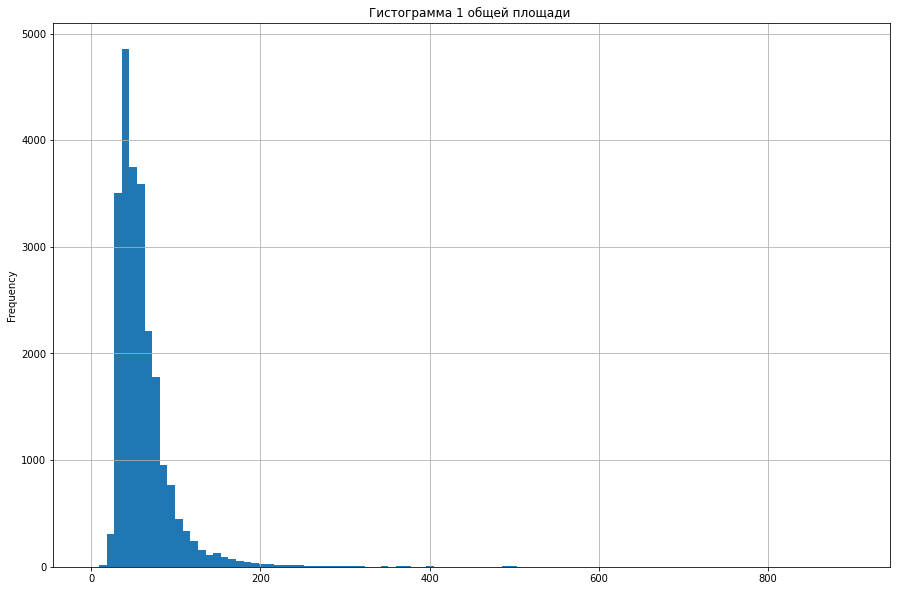

In [48]:
data['total_area'].plot(kind='hist',
                        title='Гистограмма 1 общей площади ',
                        range = (0, 900), 
                        bins=100,
                        grid=True,
                        figsize=(15, 10))

plt.show()

**Вывод :**
1. В среднем продают квартиры с площадью от 35 до 60 м2
2. Больше половины продают квартиры с площадью приблизительно равной 69 м2
3. Половина продает квартиры с площадью 52 м2
4. Четверть продает квартиры с площадью 40 м2
5. Самая минимальная площадь продажи квартиры 12 м2 
6. Самая максимальная площадь продажи квартиры 900 м2

Данные имеют нормальное распределение. Нет пропущенных значений. 

####  Гистограмма 2 жилой площади - living_area

In [49]:
data['living_area'].describe()

count    23689.000000
mean        34.102484
std         21.164757
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

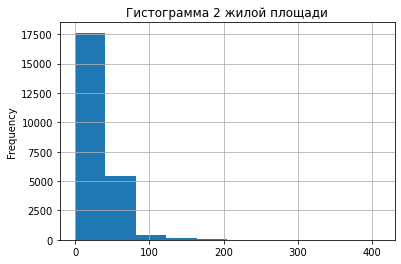

In [50]:
data['living_area'].plot(kind='hist',
                        title='Гистограмма 2 жилой площади',
                        range = (0, 410), 
                        
                        grid=True,
                        )

plt.show()

**Вывод :**
1. В среднем жилая площадь квартиры с площадью от 21 до 34 м2
2. Больше половины объявлений жилая площадь квартиры ~ 41 м2
3. Половина объявлений жилая площадь квартиры ~ 30 м2
4. Четверть объявлений жилая площадь квартиры ~ 19 м2
5. Самая минимальная площадь продажи квартиры - 2 м2 
6. Самая максимальная площадь продажи квартиры  - 409 м2

Данные имеют распределение Пуассона. Пропущенные значения в размере 1903 были заменены на медианное значение median_living_area

#### Гистограмма 3 площади кухни; kitchen_area

In [51]:
data['kitchen_area'].describe()

count    23689.000000
mean        10.429167
std          5.632105
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

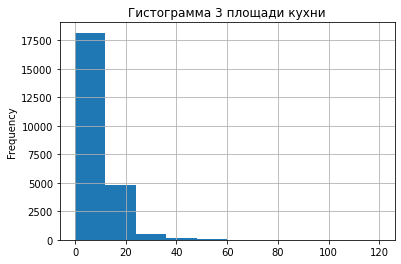

In [52]:
data['kitchen_area'].plot(kind='hist',
                        title='Гистограмма 3 площади кухни',
                        range = (0, 120), 
                        
                        grid=True,
                        )

plt.show()

**Вывод :**
1. В среднем площади кухни квартиры от 5 до 10 м2
2. Больше площади кухни квартиры ~ 11 м2
3. Половина объявлений площади кухни квартиры ~ 9 м2
4. Четверть объявлений площади кухни квартиры ~ 7 м2
5. Самая минимальная площадь кухни квартиры - 1 м2 
6. Самая максимальная площадь кухни квартиры  - 112 м2

Данные имеют распределение пуассона. Пропущенные значения в размере 2272 были заменены на медианное значение median_kitchen_area

#### Гистограмма 4 цена объекта; last_price

In [53]:
data['last_price'].describe()

count    2.368900e+04
mean     6.541858e+06
std      1.088906e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

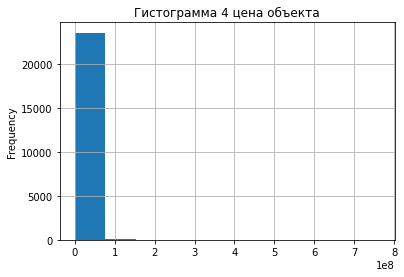

In [54]:
data['last_price'].plot(kind='hist',
                        title='Гистограмма 4 цена объекта',
                        grid=True,
                        )

plt.show()

**Вывод :** Сложно что-то сказать по гистограмме, лучше сравнить цену с остальными показателями дальше и построить по ним график зависимости.

#### Гистограмма 5 количество комнат; rooms

In [55]:
data['rooms'].describe()

count    23689.000000
mean         2.070750
std          1.078509
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

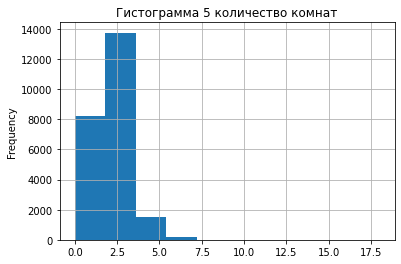

In [56]:
data['rooms'].plot(kind='hist',
                        title='Гистограмма 5 количество комнат',
                        range = (0, 18), 
                        grid=True,
                        )

plt.show()

**Вывод :**
1. В большинстве преобладают квартиры с 1 и 2 комнатами 
2. Далее уже 3 комнатные
3. После уже те что больше 3 комнат.
4. Минимальное значение 0 - студии, комнаты и т.п
5. Максимальное значение - 19 комнат

Данные имеют нормальное распределение.

#### Гистограмма 6 тип этажа квартиры («первый», «последний», «другой»); floor_type

In [57]:
data['floor_type'].describe()

count      23689
unique         3
top       другой
freq       17356
Name: floor_type, dtype: object

<AxesSubplot:>

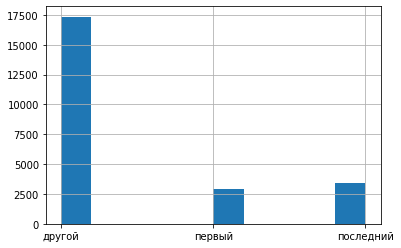

In [58]:
pd.Series(data['floor_type']).hist() # здесь не получается создать гистограмму через plot


**Вывод :** 
Больше всего типов этажа квартир Другое (все кроме первого и последнего)
Квартир с этажами на первом этаже меньше, чем квартир на последних этажах.

#### Гистограмма 7 общее количество этажей в доме; floors_total

In [59]:
data['floors_total'].describe()

count    23689.000000
mean        10.671409
std          6.596203
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

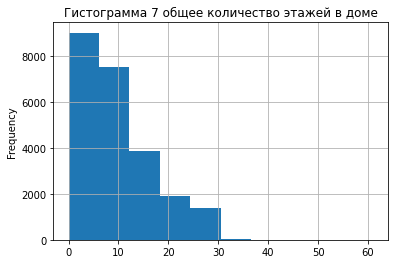

In [60]:
data['floors_total'].plot(kind='hist',
                        title='Гистограмма 7 общее количество этажей в доме',
                        range = (0, 61), 
                        
                        grid=True,
                        )

plt.show()

**Вывод :**
1. В большинстве преобладают дома с 16 этажами 75%
2. Далее уже 9-10 этажные 50%
3. А 5 этажные занимают 1/4 часть всего рынка недвижимости
4. Минимальное значение 1 этажные
5. Максимальное значение - 60 этажные здания

Данные имеют распределение пуассона. Были пропущенные значения, которые были заменены на медианное значение - 9 

#### Гистограмма 8 расстояние до центра города в метрах; city_centers_nearesta

In [61]:
data['city_centers_nearest'].describe()

count    23689.000000
mean     13936.800097
std       7554.656127
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15250.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

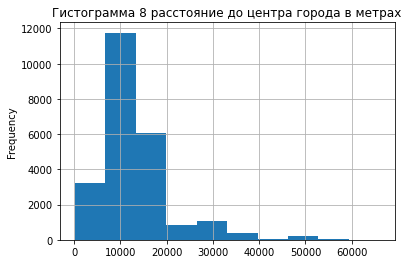

In [62]:
data['city_centers_nearest'].plot(kind='hist',
                        title='Гистограмма 8 расстояние до центра города в метрах',
                        grid=True,
                        )

plt.show()

**Вывод :**
1. Среднее расстояние квартир от центра города  13 937 м, что довольно близко.
2. Максимальное расстояние от центра города 65 968 м, это в 5 раз больше среднего значения.
3. Минимальное значение 181 метр - центр города. Возможно и квартиры там дороже.
4. в большинстве преодладают квартиры с расстоянием 15 271 м , что тоже довольно близко
5. 1/4 имеют расстояние приблизительно 10 927 м, что еще ближе.

Данные имеют нормальное распределение. Пропущенные значения были заменены на медианное значение. (Пункт 2.3.1)

#### Гистограмма 9  parks_nearest — расстояние до ближайшего парка (м)

In [63]:
data['parks_nearest'].describe()

count    8074.000000
mean      490.780778
std       342.352695
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

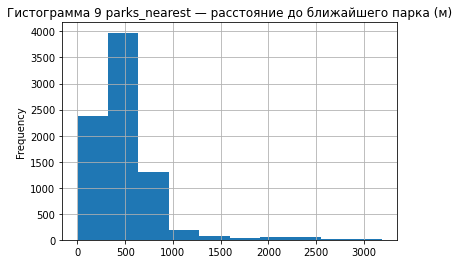

In [64]:
data['parks_nearest'].plot(kind='hist',
                        title='Гистограмма 9 parks_nearest — расстояние до ближайшего парка (м)',
                        grid=True,
                        )

plt.show()

**Вывод :**

1. min расстояние 1.0 м
2. 25% домов имеют расстоние ~ 288.0 м
3. 50% домов имеют расстоние ~ 455.0 м
4. 75% домов имеют расстоние ~ 612.0 м
5. max расстояние 3190.0 м 

Данные имеют нормальное распределение и большое количество пропущенных значений. Больше половины данных - пропущенные значения. Нельзя заменять их на медианное, это искозит все данные по столбцу.

#### Как быстро продавались квартиры (столбец days_exposition).

Этот параметр показывает, сколько дней было размещено каждое объявление.

Постройте гистограмму.

Посчитайте среднее и медиану.

В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


In [65]:
data['days_exposition'].describe()

count    20509.000000
mean       180.879614
std        219.745266
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [66]:
data['days_exposition'].median()

95.0

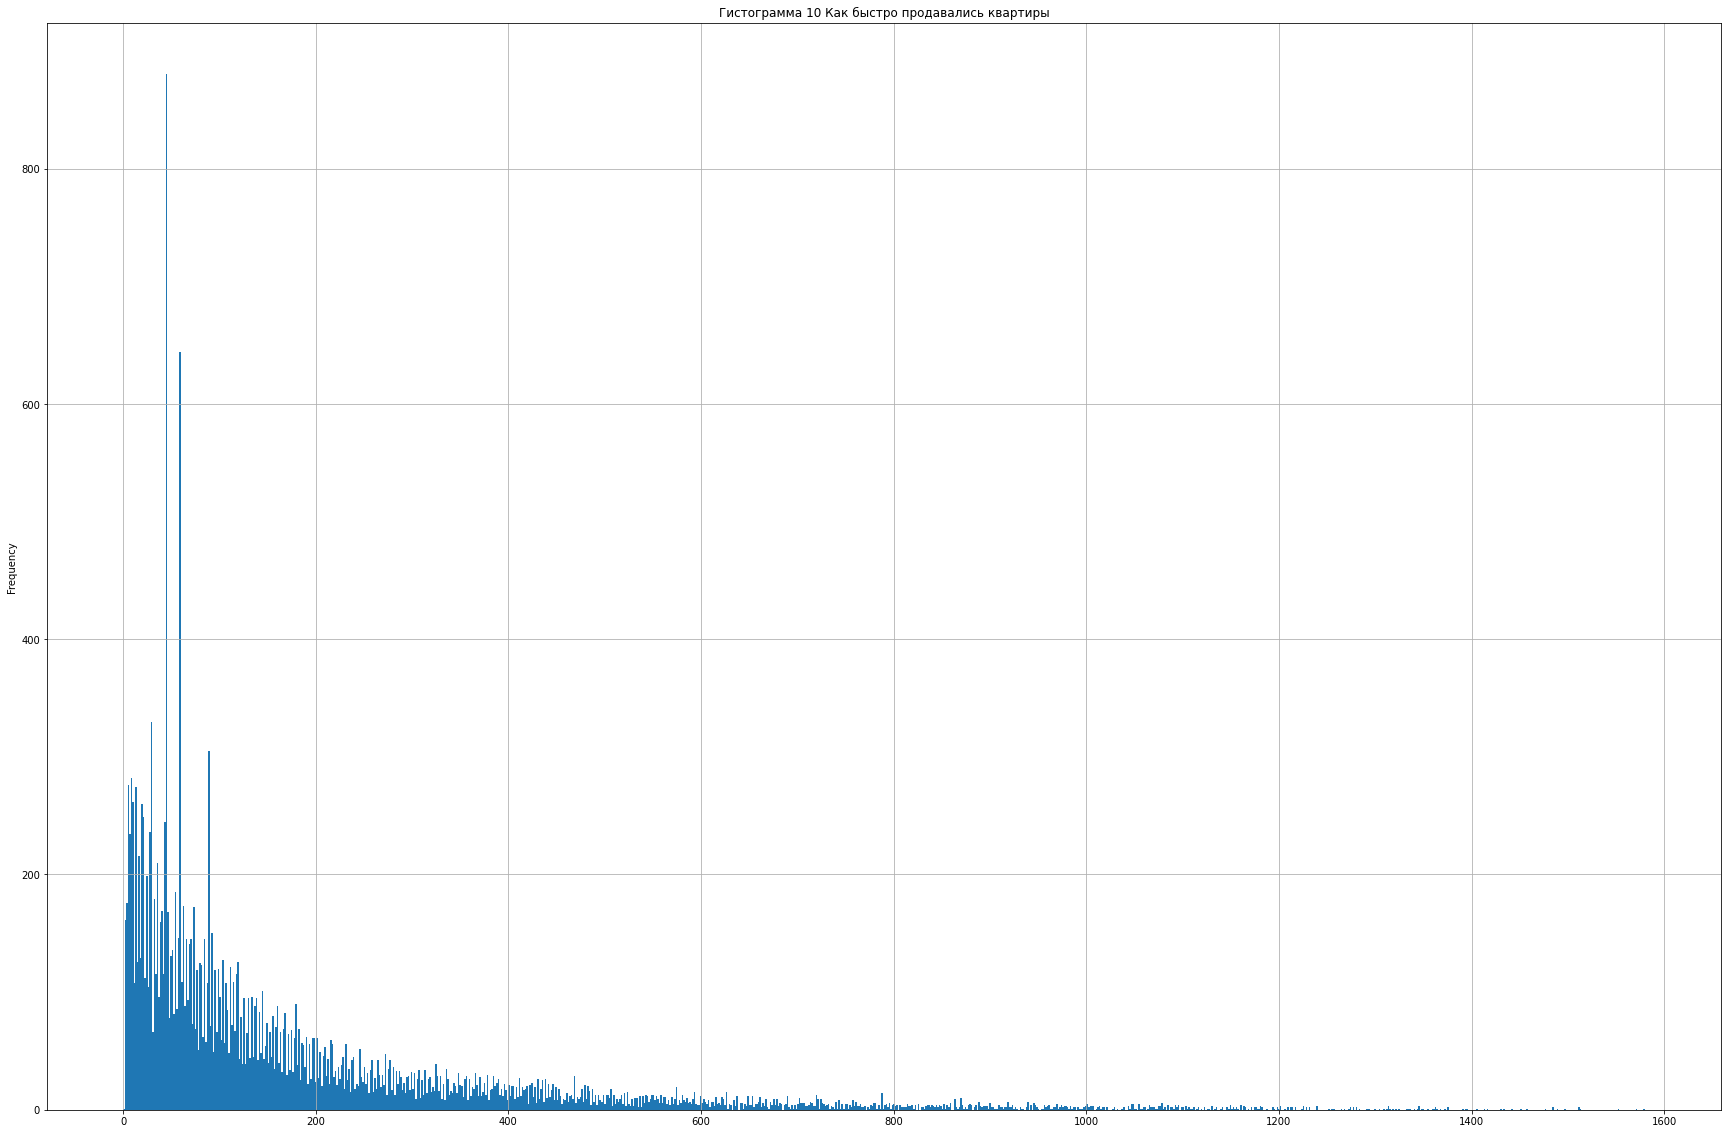

In [67]:
data['days_exposition'].plot(kind='hist',
                        title='Гистограмма 10 Как быстро продавались квартиры',
                        grid=True,
                        figsize=(30, 20), 
                        range = (0, 1580), 
                        bins=1000)

plt.show()

In [68]:
 Видно несколько выбросов, рассмотрим их поближе:

SyntaxError: invalid syntax (326821183.py, line 1)

In [ ]:
data['days_exposition'].plot(kind='hist',
                        title='Гистограмма 10.1 Как быстро продавались квартиры',
                        grid=True,
                        figsize=(30, 20), 
                        range = (0, 200), 
                        bins=1000)

plt.show()
                   



1. Здесь наблюдается, что за 45 дней было продано наибольшее количество более 820 объектов ,

2. за 60 дней было продано более 550 объектов,

3. за 30 дней продано чуть больше 200 объектов,

4. за неделю продано примерно 220 объектов недвижимости.


**Вывод :**
1. В среднем квартиры продают за 180 - 220 дней - средний

2. В большинстве 75% за приблизительно 232 дня - довольно долго

3. Половина продает с пределах 95 дней - это средний показатель скорости продажи

4. Четверть в пределах 45 дней - это быстрый показатель продажи квартиры

5. Самое минимальное это 1 день - самый быстрый, а самое максимальное 1580 дней - самый долгий срок продажи квартиры.

Cреднее значение (mean) = 180.9
Медианное median = 95.0, что почти в два раза среднего. Среднее значение искажает информацию, т.к это количественные показатели имеющие сильно максимальные значения отличающие от основной массы в 7-8 раз.

**Также есть значения Nan которые составляют 3175 значений, возможно это квартиры которые так и не продались. Или возможно данные не загрузились т.к выгружались автоматически и просто неясно сняли объявление из-за продажи, либо передумали продавать**

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Изучите, зависит ли цена от:

1. общей площади; total_area 

2. жилой площади; living_area

3. площади кухни; kitchen_area

4. количества комнат; rooms

6. этажа, на котором расположена квартира (первый, последний, другой); floor_type

7. даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

##### Зависимость цены last_price от общей площади; total_area

In [ ]:
addiction_lpta = pd.pivot_table(data, index=["total_area"], values=["last_price"])
addiction_lpta.reset_index(inplace=True)
addiction_lpta 

In [ ]:
print(f"Коэффициент корреляции составил: {addiction_lpta['total_area'].corr(addiction_lpta['last_price'])}, что говорит о прямой зависимости между ценой и общей площадью")

In [ ]:
addiction_lpta.plot(x='total_area',
                    y='last_price',
                    title='Зависимость цены last_price от общей площади total_area',
                    kind='scatter',
                    grid=True,
                    figsize=(20, 20))
plt.show()

**Вывод :**
Коэффициент корреляции составил: 0.7236823492384955, что говорит о прямой зависимости между ценой и общей площадью

На графике также наблюдается прямая зависимость цены от общей площадью.

##### Зависимость цены last_price от жилой площади; living_area

In [ ]:
addiction_lpla = pd.pivot_table(data, index=["living_area"], values=["last_price"])
addiction_lpla.reset_index(inplace=True)
addiction_lpla 

In [ ]:
print(f"Коэффициент корреляции составил: {addiction_lpla['living_area'].corr(addiction_lpla['last_price'])}, что говорит о прямой зависимости между ценой и жилой площадью")

In [ ]:
addiction_lpla.plot(x='living_area',
                    y='last_price',
                    kind='scatter',
                    title='Зависимость цены last_price от жилой площади living_area',
                    grid=True,
                    figsize=(20, 10))
plt.show()

**Вывод :**
Наблюдается прямая зависимость цены от общей площади квартиры

Коэффициент корреляции составил: 0.6555227326879295, что говорит о прямой зависимости между ценой и жилой площадью

##### Зависимость цены last_price от площади кухни; kitchen_area

In [ ]:
addiction_lpka = pd.pivot_table(data, index=["kitchen_area"], values=["last_price"])
addiction_lpka.reset_index(inplace=True)
addiction_lpka 

In [ ]:
print(f"Коэффициент корреляции составил: {addiction_lpka['kitchen_area'].corr(addiction_lpka['last_price'])}, что говорит о прямой зависимости между ценой и площадью кухни")

In [ ]:
addiction_lpka.plot(x='kitchen_area', y='last_price', kind='scatter',
                     title='Зависимость цены last_price от площади кухни kitchen_area',
                    grid=True,
                    figsize=(20, 10))
plt.show()

**Вывод :**
Коэффициент корреляции составил: 0.638954420672446, что говорит о прямой зависимости между ценой и площадью кухни
    
На графике также наблюдается прямая зависимость.

##### Зависимость цены last_price от количества комнат; rooms

In [ ]:
addiction_lpr = pd.pivot_table(data, index=["rooms"], values=["last_price"])
addiction_lpr.reset_index(inplace=True)
addiction_lpr

In [ ]:
print(f"Коэффициент корреляции составил: {addiction_lpr['rooms'].corr(addiction_lpr['last_price'])}, что говорит об отстутствии зависимости между ценой и количеством комнат")

In [ ]:
addiction_lpr.plot(x='rooms',
                   y='last_price',
                   kind='scatter',
                   grid=True,
                   title='Зависимость цены last_price от количества комнат rooms',
                   figsize=(20, 10))
plt.show()

**Вывод:** 

Коэффициент корреляции составил: 0.2732808355902112, что говорит об отстутствии зависимости между ценой и количеством комнат
    
На графике также видна низкая зависимость

##### Зависимость цены last_price от этажа, на котором расположена квартира (первый, последний, другой);  floor_type

In [ ]:
addiction_lpft = pd.pivot_table(data, index=["floor_type"], values=["last_price"])
addiction_lpft.reset_index(inplace=True)
addiction_lpft


In [ ]:
addiction_lpft.plot(x='floor_type', y='last_price', kind='scatter',
                    grid=True,
                    title='Зависимость цены last_price от этажа, на котором расположена квартира (первый, последний, другой) floor_type',
                    figsize=(20, 10))
plt.show()

**Вывод :**
Есть зависимость цены квартиры от этажа на котором она располагается, ниже всего цена в квартирах на 1 этаже, выше в квартирах не на 1 и последнем этажах, пиковая цена уже в квартирах на самом высоком этаже. Можно предположить, что это Пентхаус. 

##### Зависимость цены last_price от  даты размещения (день недели, месяц, год); 'weekday', 'month','year'.

In [ ]:
addiction_lpwmy = pd.pivot_table(data, index=['weekday', 'month', 'year'], values=["last_price"])
addiction_lpwmy.reset_index(inplace=True)
addiction_lpwmy


In [ ]:
addiction_lpwmy.plot(x='weekday', y='last_price', kind='scatter',
                    grid=True,
                    title='Зависимость цены last_price от weekday',
                    figsize=(20, 10))

plt.show()

**Вывод :**
В целом по графику основные цены не выявляют зависимости от дня недели, но есть выбросы,
которые могут соврать что в четверг бывает самая высокая цена. Также по выбросам можно сказать, что бывают цены ниже, если публикация была в субботу)))

In [ ]:
addiction_lpwmy.plot(x='month', y='last_price', kind='scatter',
                    grid=True,
                    title='Зависимость last_price от month',
                    figsize=(20, 10))
plt.show()

In [ ]:
addiction_lpwmy.plot(x='year',
                     y='last_price',
                     kind='scatter',
                     title='Зависимость last_price от year',
                     grid=True,
                     figsize=(20, 10))

plt.show()

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
— постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Ранее вы посчитали расстояние до центра в километрах.

**Рассчитаем сколько всего раз повторяется каждый населенный пункт и определим первые 10 нас.пунктов с наибольшим числом объявлений и их среднюю цену за м2**

In [ ]:
#С помощью сводной таблицы (метод pivot_table отсортируем данные по городам и рассчитаем среднюю цену за м2 и всего объявлений
city_mean = data.pivot_table(index='locality_name', values='price_one_metr2', aggfunc='mean')
city_mean['count']= data.pivot_table(index='locality_name', values='price_one_metr2', aggfunc='count')
# Меняем названия столбцов
city_mean.columns = ['mean', 'count'] 
city_mean = city_mean.sort_values(by='count', ascending=False).reset_index() 
city_mean_price_count = city_mean.head(10)
# Таблица средняя цена одного квадратного метра(mean) в 10 населённых пунктах 'locality_name' с наибольшим числом объявлений
city_mean_price_count

**Вывод :** 

Из числа с наибольшим количеством объявлений 10 населенных пунктов:

    1   Санкт-Петербург	114823 р/м2
    2   Поселок Мурино	85681р/м2
    3   Пселок Шушары	78677 р/м2
    4	Всеволожск	68654 р/м2
    5	Пушкин	103125 р/м2
    6	Колпино	75424 р/м2
    7	поселок Парголово	90175 р/м2
    8	Гатчина	68746 р/м2
    9	деревня Кудрово	92473 р/м2
    10  Выборг	58141 р/м2

Самая высокая средняя цена за м2 - Санкт-Петербург

Самая низкая средняя цена за м2 - Выборг

#### Квартиры в Санкт-Петербурге их средняя стоимость на разном удалении от центра
Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name

и вычислите их среднюю стоимость на разном удалении от центра.

Учитывайте каждый километр расстояния: узнайте среднюю цену квартир

в одном километре от центра, в двух и так далее.

Опишите, как стоимость объектов зависит от расстояния до центра города

— постройте график изменения средней цены для каждого километра от центра Петербурга.

In [ ]:
spb_mean_km = (
    data
    .query('locality_name == "Санкт-Петербург"')#cортируем по городу ставя условия через метод query
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=['mean'])
)
spb_mean_km.columns = ['mean_price_spb']
# функция reset_index используется для преобразования индекса в столбец данных
spb_mean_km.reset_index(inplace=True)
spb_mean_km.style.format({'mean': '{:.3f}'})


In [ ]:
spb_mean_km.plot(x='city_centers_nearest_km', y='mean_price_spb', style='o-',
                    kind='scatter',
                    grid=True,
                    figsize=(10, 5))
# График изменения цены

**Вывод:**
    в самом центре средняя цена квартиры приблизительно 31 млн
    
    в 29 км от центра 4 млн

### Напишите общий вывод

**1. Чтение данных. (Пункт 1)**
Данные разделены не запятой,а знаком табуляции, поэтому применим доп параметр sep='\t'для прочтения данных

После открытия данных видим, что много столбцов с пропущенными значениями,

также есть столбцы с типом bool, их нужно будеть заменить на числовой тип данных,

также есть колонка первый день экспозиции - там дата и время, нужно поменять тип данных со строкового на дататайм.

**2. Определение столбцов с пропусками (Пункт 2.1)** 

Найдено 14 столбцов с пропущенными значениями из 24, 8 из которых не имеют пропущенных значений

**2.1 Заменили пропущенные значения ceiling_heigh на медианное значение (Пункт 2.2.1)**

В столбце ceiling_height (высота потолков) удалили строки, в которых встречаются аномальные значения.

Также те, что похожи на опечаток заменили на обычные значения например 25 м сделали 2.5 м.

min высота потолков = 1.75 м

25% объявлений имеют высоту потолков = 2.51 м

50% объявлений имеют высоту потолков = 2.65 м

75% объявлений имеют высоту потолков = 2.80 м

max высота потолков = 6.0 м

Всего 23689 значений

**2.2 Заменили пропущенные значения floors_total на медианное значение (Пункт 2.2.2)**

В столбце floors_total (Всего этажей дома) заменили пропущенные значения на значения из столбца floor.

min количество этажей 1 этаж

25% объявлений имеют в доме всего = 5 этажей

50% объявлений имеют в доме всего = 9 этажей

75% объявлений имеют в доме всего = 16 этажей

max количество этажей = 60 этажей

Всего 23689 значений

**2.3 Заменили пропущенные значения living_area на медианное значение (Пункт 2.2.3) **

В столбце living_area — жилая площадь в квадратных метрах (м²) заменили пропущенные значения на медианное значение 9.

min жилая площадь =  2.0 м²

25% жилой площади = 19.0 м²

50% жилой площади = 30.0 м²

75% жилой площади = 41.1 м²

max жилая площадь =  409.7 м²

Всего 23689 значений

**2.4 Замена пропущенных значений kitchen_area на медианное значение (Пункт 2.2.4)**

В столбце living_area — площадь кухни в квадратных метрах (м²) заменили пропущенные значения на медианное значение 9.

min площадь кухни 1.3 м²

25% площади кухни 7.4 м² 

50% площади кухни 9.1 м²

75% площади кухни 11.4 м²

max площадь кухни 112.0 м²

Всего 23689 значений

**2.5 Замена пропущенных значений balcony на 0 (Пункт 2.2.5)**

Заменены пропущенные значения столбца (balcony - количество балконов в квартире) на 0 т.к скорее всего написали нет балкона и все значения стали Nan, хотя тип данных числовой.

min равно 0 балконов

25% имеют 0 балконов

50% имеют 1 балкон

75% имеют 2 балкона

max равно 5 балконов

Всего 23689 значений

**2.6  Замена пропущенных значений is_apartment и преобразование типа данных (Пункт 2.2.6)**

Поменяли буллевые значения на 0 и 1, а пропущенные можно на 0 т.к скорее всего написали нет вместо булевого значения

В основном преобладает значение 0 - аппартаменты

Всего 23689 значений

**2.7 Переименуем столбец "cityCenters_nearest" чтобы не было заглавных букв "city_сenters_nearest" (Пункт 2.3)**

Заменили пропущенные значения на медианное значение 13098.5 (Пункт 2.3.1)

min расстояние до центра 181 м

25% квартир имеюют расстояние до центра примерно 10927 м

50% квартир имеюют расстояние до центра примерно 13098 м

75% квартир имеюют расстояние до центра примерно 15250 м

max расстояние до центра 65968 м

Всего 23689 значений

**2.8 Поиск и замена/удаление дубликатов  locality_name (Пункт 2.4)**

Нашли и заменили неявные дубликаты в основном они состояли в буквах 'ё', 'е'.

Нашли и заменили повторяющиеся названия поселков 

**2.9 Преобразование типа данных столбцов studio и open_plan (Пункт 2.4)**

Заменили булевые значения на числовые  В результате: True становится равным 1, а False — 0.

**3. Добавили новые столбцы (Пункт 3)**

**3.1 Добавили новый столбец price_one_metr2 - цена одного квадратного метра (Пункт 3.1)**

**3.2 Добавили новый столбец weekday - день недели публикации объявления (Пункт 3.2)**

**3.3 Добавили новый столбец month - месяц публикации объявления (Пункт 3.3)**

**3.4 Добавили новый столбец year - год публикации объявления (Пункт 3.4)**

**3.5 Добавили новый столбец floor_type тип этажа квартиры (значения — «‎первый», «последний», «другой») (Пункт 3.4)**

**3.5 Добавили новый столбец city_centers_nearest_km расстояние до центра города в километрах

**4. Провели исследовательский анализ данных**
Изучили параметры и построили по ним гистограммы:

**4.1 Гистограмма 1 общей площади - total_area (Пункт 4.1)**
1. В среднем продают квартиры с площадью от 35 до 60 м2
2. Больше половины продают квартиры с площадью приблизительно равной 69 м2
3. Половина продает квартиры с площадью 52 м2
4. Четверть продает квартиры с площадью 40 м2
5. Самая минимальная площадь продажи квартиры 12 м2 
6. Самая максимальная площадь продажи квартиры 900 м2

Данные имеют нормальное распределение. Нет пропущенных значений. 

**4.2 Гистограмма 2 жилой площади - living_area (Пункт 4.2)**
1. В среднем жилая площадь квартиры с площадью от 21 до 34 м2
2. Больше половины объявлений жилая площадь квартиры ~ 41 м2
3. Половина объявлений жилая площадь квартиры ~ 30 м2
4. Четверть объявлений жилая площадь квартиры ~ 19 м2
5. Самая минимальная площадь продажи квартиры - 2 м2 
6. Самая максимальная площадь продажи квартиры  - 409 м2

Данные имеют распределение Пуассона. Пропущенные значения в размере 1903 были заменены на медианное значение median_living_area

**4.3 Гистограмма 3 площади кухни; kitchen_area (Пункт 4.3)**
1. В среднем площади кухни квартиры от 5 до 10 м2
2. Больше площади кухни квартиры ~ 11 м2
3. Половина объявлений площади кухни квартиры ~ 9 м2
4. Четверть объявлений площади кухни квартиры ~ 7 м2
5. Самая минимальная площадь кухни квартиры - 1 м2 
6. Самая максимальная площадь кухни квартиры  - 112 м2

Данные имеют распределение пуассона. Пропущенные значения в размере 2272 были заменены на медианное значение median_kitchen_area

**4.4 Гистограмма 4 цена объекта; last_price (Пункт 4.4)**

Сложно что-то сказать по гистограмме, лучше сравнить цену с остальными показателями дальше и построить по ним график зависимости. (Пункт 4.11)

**4.5 Гистограмма 5 количество комнат; rooms (Пункт 4.5)**

1. В большинстве преобладают квартиры с 3 комнатами 75%
2. Далее уже 2 комнатные 50%
3. А 1 комнатные занимают 4 часть всего рынка недвижимости 25%
4. Минимальное значение 0 - студии, комнаты и т.п
5. Максимальное значение - 19 комнат

Данные имеют нормальное распределение.

**4.6  Гистограмма 6 тип этажа квартиры («первый», «последний», «другой»); floor_type (Пункт 4.6)**

Больше всего типов этажа квартир Другое (все кроме первого и последнего)
Квартир с этажами на первом этаже меньше, чем квартир на последних этажах.

**4.7 Гистограмма 7 общее количество этажей в доме; floors_total (Пункт 4.7)**

1. В большинстве преобладают дома с 16 этажами 75%
2. Далее уже 9-10 этажные 50%
3. А 5 этажные занимают 1/4 часть всего рынка недвижимости
4. Минимальное значение 1 этажные
5. Максимальное значение - 60 этажные здания

Данные имеют распределение пуассона. Были пропущенные значения, которые были заменены на медианное значение - 9 

**4.8 Гистограмма 8 расстояние до центра города в метрах; city_centers_nearesta (Пункт 4.8)**

1. Среднее расстояние квартир от центра города  13 937 м, что довольно близко.
2. Максимальное расстояние от центра города 65 968 м, это в 5 раз больше среднего значения.
3. Минимальное значение 181 метр - центр города. Возможно и квартиры там дороже.
4. в большинстве преодладают квартиры с расстоянием 15 271 м , что тоже довольно близко
5. 1/4 имеют расстояние приблизительно 10 927 м, что еще ближе.

Данные имеют нормальное распределение. Пропущенные значения были заменены на медианное значение. (Пункт 2.3.1)


**4.9 Гистограмма 9 parks_nearest — расстояние до ближайшего парка (м) (Пункт 4.9)**

1. min расстояние 1.0 м
2. 25% домов имеют расстоние ~ 288.0 м
3. 50% домов имеют расстоние ~ 455.0 м
4. 75% домов имеют расстоние ~ 612.0 м
5. max расстояние 3190.0 м 

Данные имеют нормальное распределение и большое количество пропущенных значений. Больше половины данных - пропущенные значения. Нельзя заменять их на медианное, это искозит все данные по столбцу.

**4.10  Как быстро продавались квартиры (столбец days_exposition) (Пункт 4.10)**

1. В среднем квартиры продают за 180 - 220 дней - средний

2. В большинстве 75% за приблизительно 232 дня - довольно долго

3. Половина продает с пределах 95 дней - это средний показатель скорости продажи

4. Четверть в пределах 45 дней - это быстрый показатель продажи квартиры

5. Самое минимальное это 1 день - самый быстрый, а самое максимальное 1580 дней - самый долгий срок продажи квартиры.

Cреднее значение (mean) = 180.9
Медианное median = 95.0, что почти в два раза среднего. Среднее значение искажает информацию,
т.к это количественные показатели имеющие сильно максимальные значения отличающие от основной массы в 7-8 раз.

Также есть значения Nan которые составляют 3175 значений, возможно это квартиры которые так и не продались. Или возможно данные не загрузились т.к выгружались автоматически и просто неясно сняли объявление из-за продажи, либо передумали продавать

**4.11 Факторы, которые больше всего влияют на общую (полную) стоимость объекта**

**4.11.1 Зависимость цены last_price от общей площади; total_area (Пункт 4.11.1)**
Коэффициент корреляции составил: 0.7236823492384955, что говорит о прямой зависимости между ценой и общей площадью
На графике также наблюдается прямая зависимость цены от общей площадью.

**4.11.2 Зависимость цены last_price от жилой площади; living_area (Пункт 4.11.2)**

Наблюдается прямая зависимость цены от общей площади квартиры
Коэффициент корреляции составил: 0.6555227326879295, что говорит о прямой зависимости между ценой и жилой площадью

**4.11.3 Зависимость цены last_price от площади кухни; kitchen_area (Пункт 4.11.3)**

Коэффициент корреляции составил: 0.638954420672446, что говорит о прямой зависимости между ценой и площадью кухни
На графике также наблюдается прямая зависимость.

**4.11.4 Зависимость цены last_price от количества комнат; rooms (Пункт 4.11.4)**

Коэффициент корреляции составил: 0.2732808355902112, что говорит об отстутствии зависимости между ценой и количеством комнат
На графике также видна низкая зависимость

**4.11.5 Зависимость цены last_price от этажа, на котором расположена квартира (первый, последний, другой); floor_type (Пункт 4.11.5)**

Есть зависимость цены квартиры от этажа на котором она располагается, ниже всего цена в квартирах на 1 этаже, выше в квартирах не на 1 и последнем этажах, пиковая цена уже в квартирах на самом высоком этаже. Можно предположить, что это Пентхаус. 

**4.11.6 Зависимость цены last_price от  даты размещения (день недели, месяц, год); 'weekday', 'month','year'. (Пункт 4.11.6)**

В целом по графику не видна зависимость от дня недели, месяца или года но есть выбросы,

которые могут соврать что в четверг бывает самая высокая цена и т.п

**4.12 Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений ункт (Пункт 4.12)**

Из числа с наибольшим количеством объявлений 10 населенных пунктов:

    1   Санкт-Петербург	114823 р/м2
    2   Поселок Мурино	85681р/м2
    3   Пселок Шушары	78677 р/м2
    4	Всеволожск	68654 р/м2
    5	Пушкин	103125 р/м2
    6	Колпино	75424 р/м2
    7	поселок Парголово	90175 р/м2
    8	Гатчина	68746 р/м2
    9	деревня Кудрово	92473 р/м2
    10  Выборг	58141 р/м2

Самая высокая средняя цена за м2 - Санкт-Петербург

Самая низкая средняя цена за м2 - Выборг

**4.13 Квартиры в Санкт-Петербурге их средняя стоимость на разном удалении от центра**

Рассчитали среднюю стоимость квартиры на расстоянии от центра города от 1 км до 29 км: 

в центре средняя стоимость 31 449 115 р
в 1 км от центра 21 206 720 р
в 29 км от центра 4 236 666 р

Построили график где видна средняя стомость квартиры в каждом отдалении на 1 км от центра 


Определили рыночную среднюю стоимость недвижимости и 
Создали автоматическую систему, которая рассчитает средннюю цену квартиры на расстоянии от 1 км от центра 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.